In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scipy.io
from sklearn import svm
import os
import pandas as pd
import numpy as np
from mat4py import loadmat
from sklearn import svm 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time 
from sklearn.metrics import confusion_matrix

In [2]:
mydir = 'combinedDataset'

In [3]:
codeDF = pd.read_csv(os.path.join(mydir, "combinedCode.csv")) 
xDF = pd.read_csv(os.path.join(mydir, "combinedX.csv")) 
yDF = pd.read_csv(os.path.join(mydir, "combinedY.csv")) 
x = xDF.to_numpy()
y = yDF.to_numpy()
code = codeDF.to_numpy()

In [29]:
yDF

,1.000000000000000000e+00
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0
...,...
57594,-1.0
57595,-1.0
57596,-1.0
57597,-1.0


In [30]:
xDF

,-1.420973903572234576e+03,-3.568261745229987810e+03,2.389298051973451038e+03,3.488167069844806974e+03,2.164287410031979562e+03,3.515829063518812745e+03,2.054001485239520662e+03,1.558983155993417313e+03,-4.442636655712282590e+01,-2.583464770822612991e+03,...,4.233055468306124567e+03,6.150637103935473533e+03,4.999926935113588115e+03,4.703125550666647541e+03,2.233743960657486696e+03,-1.306484701339850062e+03,-1.311108594939305021e+03,-5.691294420654303394e+02,-1.666838434390655266e+03,-2.461333730095061128e+03
0,1425.271138,3845.915239,2178.865856,1840.409081,-48.742114,-2162.807185,759.287029,4655.162866,2612.773318,654.993388,...,3479.764036,58.584602,-496.629814,1172.580325,-1616.471362,-1207.000213,1416.239774,-587.321910,-1024.314642,-300.112690
1,-142.061099,-951.585052,1347.188840,5487.101345,3375.847486,1245.901901,3526.014360,3310.244959,2549.406022,3346.250120,...,206.434577,659.457901,3657.010305,423.954927,1611.027871,1808.910347,164.108684,1248.126402,1488.278328,1170.592043
2,941.311698,2576.822997,4006.115756,4077.841254,3124.845375,4083.518594,4772.343253,5071.104441,2687.911616,1123.726902,...,2145.830065,2752.887396,691.090342,2241.135215,1699.624496,-1.195357,2220.815013,3344.289564,2588.374320,2279.192978
3,1230.491990,5621.680043,5915.851614,6210.406594,3873.031258,2073.881884,4173.814256,3103.081668,1700.601151,1183.023119,...,2605.409531,591.009692,3020.948664,4061.382144,2780.406816,4140.150874,3550.232860,1658.000581,1853.464943,2241.447017
4,1342.316751,4914.170039,5882.984520,4885.857697,3702.249417,2602.702135,1273.482470,794.865080,1580.192723,4075.555189,...,3833.488089,5176.991762,4335.858914,2669.716081,2742.401108,1613.180358,3030.385247,4130.161855,2759.667901,2075.339945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57594,1195.394860,992.238109,-580.824715,-43.675367,-749.185014,467.342075,1815.065544,3388.823671,3161.361986,2370.117562,...,-2214.335954,-2069.278995,-418.124211,1501.482930,1211.023587,1994.388683,3278.211137,1957.664241,98.326777,-573.631180
57595,155.515108,363.143999,1824.891489,3714.774167,2929.943569,2754.829182,2629.764231,1558.861270,-394.846006,-2177.455866,...,585.640286,1909.381411,2694.220451,1789.437892,-72.608533,-1689.631603,-221.997723,1557.877477,2088.293203,2170.447094
57596,1038.083908,3880.618330,3188.282092,2275.307440,233.267474,-1531.453228,1829.944642,4707.913614,2459.908933,751.246425,...,-441.991533,-1819.608630,-301.798420,1071.961141,2510.645805,1502.125917,-1151.433344,-838.397876,44.888446,29.425059
57597,292.355403,-216.229096,2622.883293,5631.716359,3327.227833,1587.494478,1379.567447,610.174728,-898.495213,-458.136631,...,2875.603321,2059.697332,-832.552580,-410.224314,703.703979,-582.199274,508.934405,2485.711742,2612.737621,2376.837379


In [31]:
codeDF

,3.000000000000000000e+00
0,8.0
1,4.0
2,6.0
3,11.0
4,7.0
...,...
57594,5.0
57595,12.0
57596,6.0
57597,1.0


## K fold validation of LDA

In [4]:
from sklearn.model_selection import KFold

In [5]:
k = 10

In [6]:
kf = KFold(n_splits = k, shuffle = False)
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    xTrain = x[train_index]
    xTest = x[test_index]
    yTrain = y[train_index]
    yTest = y[test_index]

TRAIN: [ 5760  5761  5762 ... 57596 57597 57598] TEST: [   0    1    2 ... 5757 5758 5759]
TRAIN: [    0     1     2 ... 57596 57597 57598] TEST: [ 5760  5761  5762 ... 11517 11518 11519]
TRAIN: [    0     1     2 ... 57596 57597 57598] TEST: [11520 11521 11522 ... 17277 17278 17279]
TRAIN: [    0     1     2 ... 57596 57597 57598] TEST: [17280 17281 17282 ... 23037 23038 23039]
TRAIN: [    0     1     2 ... 57596 57597 57598] TEST: [23040 23041 23042 ... 28797 28798 28799]
TRAIN: [    0     1     2 ... 57596 57597 57598] TEST: [28800 28801 28802 ... 34557 34558 34559]
TRAIN: [    0     1     2 ... 57596 57597 57598] TEST: [34560 34561 34562 ... 40317 40318 40319]
TRAIN: [    0     1     2 ... 57596 57597 57598] TEST: [40320 40321 40322 ... 46077 46078 46079]
TRAIN: [    0     1     2 ... 57596 57597 57598] TEST: [46080 46081 46082 ... 51837 51838 51839]
TRAIN: [    0     1     2 ... 51837 51838 51839] TEST: [51840 51841 51842 ... 57596 57597 57598]


In [7]:
start = time.time() 
ldaClf = LinearDiscriminantAnalysis()
ldaClf.fit(xTrain, yTrain.ravel())
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 2.0262300968170166s


In [9]:
start = time.time() 
predictedLabel= ldaClf.predict(xTest)
[[tn, fp],[fn, tp]] = confusion_matrix(yTest.ravel(), predictedLabel)
print(f"tp: {tp}") 
print(f"fp: {fp}")
print(f"tn: {tn}") 
print(f"fn: {fn}") 
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy
stop = time.time()
print(f"Testing time: {stop - start}s")

tp: 299
fp: 138
tn: 4662
fn: 660
Testing time: 0.012038946151733398s


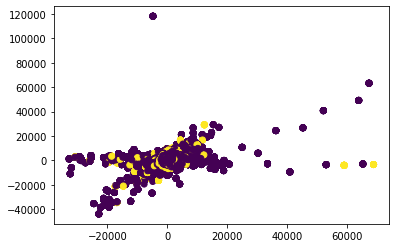

In [117]:
plt.scatter(x[:,70],x[:,90], c = y, cmap='viridis')
#plt.scatter(x,y)
plt.legend
plt.show()